In [ ]:
import tensorflow as tf ### models
import numpy as np ### math computations
import matplotlib.pyplot as plt### plots

import cv2 ## image processing
import seaborn as sns ### visualizations
import datetime
import io
import os
import random
from google.colab import files
from PIL import Image

import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Conv2D, MaxPool2D,GlobalAveragePooling2D, Dense, Flatten, InputLayer, BatchNormalization, Input, Dropout, RandomFlip, RandomRotation, Resizing, Rescaling
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC, binary_accuracy, CategoricalAccuracy, TopKCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, CSVLogger, EarlyStopping, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers  import L2, L1
from tensorboard.plugins.hparams import api as hp
from google.colab import drive
from sklearn.metrics import classification_repor

In [ ]:
!pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d prasadvpatil/mrl-dataset

 97% 22.0M/22.6M [00:02<00:00, 18.6MB/s]
100% 22.6M/22.6M [00:02<00:00, 11.2MB/s]


In [ ]:
!unzip "/content/mrl-dataset.zip" -d "/content/dataset/"

Archive:  /content/mrl-dataset.zip
  inflating: /content/dataset/train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png  
  inflating: /content/dataset/train/Closed_Eyes/s0001_00002_0_0_0_0_0_01.png  
  inflating: /content/dataset/train/Closed_Eyes/s0001_00003_0_0_0_0_0_01.png  
  inflating: /content/dataset/train/Closed_Eyes/s0001_00004_0_0_0_0_0_01.png  
  inflating: /content/dataset/train/Closed_Eyes/s0001_00005_0_0_0_0_0_01.png  
  inflating: /content/dataset/train/Closed_Eyes/s0001_00006_0_0_0_0_0_01.png  
  inflating: /content/dataset/train/Closed_Eyes/s0001_00007_0_0_0_0_0_01.png  
  inflating: /content/dataset/train/Closed_Eyes/s0001_00008_0_0_0_0_0_01.png  
  inflating: /content/dataset/train/Closed_Eyes/s0001_00009_0_0_0_0_0_01.png  
  inflating: /content/dataset/train/Closed_Eyes/s0001_00011_0_0_0_0_0_01.png  
  inflating: /content/dataset/train/Closed_Eyes/s0001_00013_0_0_0_0_0_01.png  
  inflating: /content/dataset/train/Closed_Eyes/s0001_00014_0_0_0_0_0_01.png  
  inflating: /con

In [ ]:
dataset_directory = "/content/dataset/train"
CLASS_NAMES = ['Closed_Eyes', 'Open_Eyes']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
CONFIG = {'IM_SIZE': 256,
          'BATCH_SIZE':32,
          'LEARNING_RATE': 0.001,
          'N_EPOCHS':16,
          'DROPOUT_RATE':0.0,
          'REGULARIZATION_RATE': 0.0,
          'N_FILTERS':6,
          'KERNEL_SIZE': 3,
          'N_STRIDES': 1,
          'POOL_SIZE': 2,
          'N_DENSE_1':100,
          'N_DENSE_2':10,
          'NUM_CLASSES':2

          }

# Dataset Loading

In [ ]:
train_data,test_data = tf.keras.utils.image_dataset_from_directory(
    dataset_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIG['BATCH_SIZE'],
    image_size=(CONFIG['IM_SIZE'], CONFIG['IM_SIZE']),
    shuffle=True,
    seed=101,
    validation_split=0.2,
    subset="both",

)

Found 4000 files belonging to 2 classes.
Using 3200 files for training.
Using 800 files for validation.


In [ ]:
# test_data = tf.keras.utils.image_dataset_from_directory(
#     dataset_directory,
#     labels='inferred',
#     label_mode='categorical',
#     class_names=CLASS_NAMES,
#     color_mode='rgb',
#     batch_size=CONFIG['BATCH_SIZE'],
#     image_size=(CONFIG['IM_SIZE'], CONFIG['IM_SIZE']),
#     shuffle=True,
#     seed=101,
#     validation_split=0.2,
#     subset="validation",

# )

Found 4000 files belonging to 2 classes.
Using 800 files for validation.


In [ ]:
for i in train_data.take(1):
  print(i)


(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[ 82.      ,  82.      ,  82.      ],
         [ 81.48828 ,  81.48828 ,  81.48828 ],
         [ 80.48047 ,  80.48047 ,  80.48047 ],
         ...,
         [204.68164 , 204.68164 , 204.68164 ],
         [208.20898 , 208.20898 , 208.20898 ],
         [210.      , 210.      , 210.      ]],

        [[ 80.7207  ,  80.7207  ,  80.7207  ],
         [ 80.47084 ,  80.47084 ,  80.47084 ],
         [ 79.978745,  79.978745,  79.978745],
         ...,
         [205.00896 , 205.00896 , 205.00896 ],
         [208.14952 , 208.14952 , 208.14952 ],
         [209.74414 , 209.74414 , 209.74414 ]],

        [[ 78.20117 ,  78.20117 ,  78.20117 ],
         [ 78.467026,  78.467026,  78.467026],
         [ 78.990616,  78.990616,  78.990616],
         ...,
         [205.65361 , 205.65361 , 205.65361 ],
         [208.0324  , 208.0324  , 208.0324  ],
         [209.24023 , 209.24023 , 209.24023 ]],

        ...,

        [[158.92188 , 158.92188 

# Data Visualisation

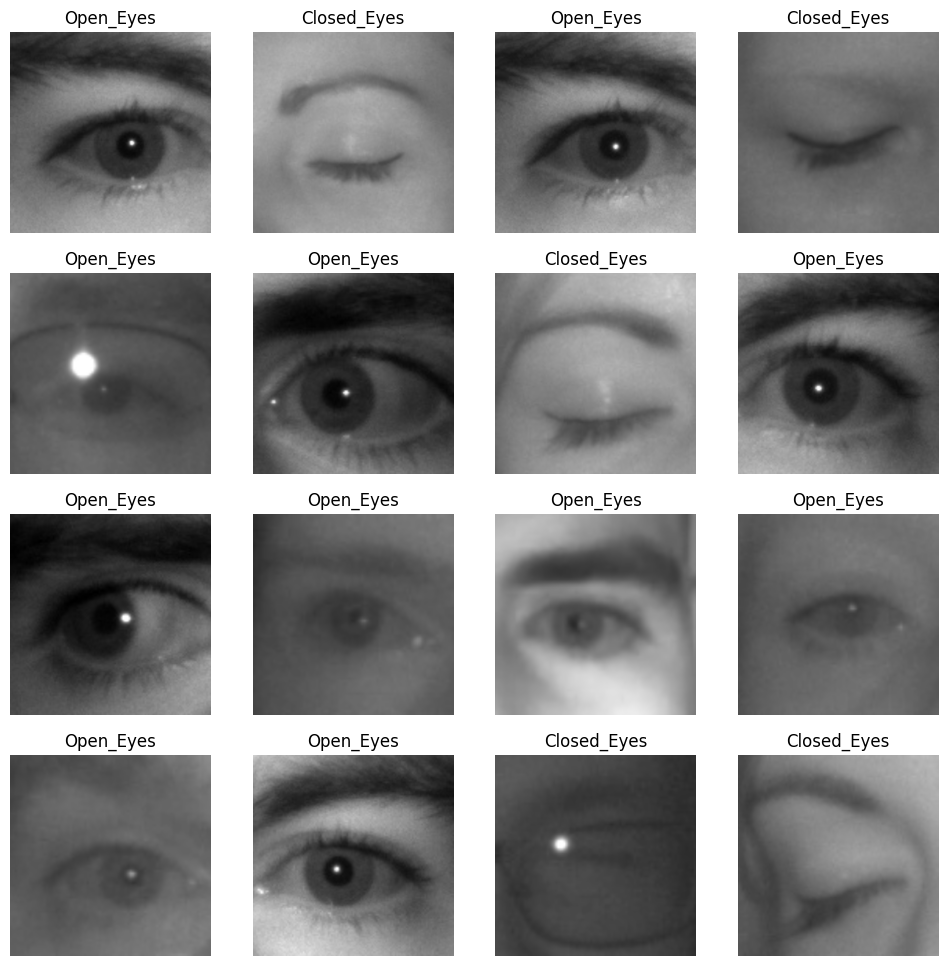

In [ ]:
plt.figure(figsize = (12,12))
for images, labels in train_data.take(1):
  for i in range(16):
    ax=plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)
    plt.title(CLASS_NAMES[tf.argmax(labels[i],axis =0).numpy()])
    plt.axis("off")

# Dataset Preparation

In [ ]:
train_data = (
    train_data.prefetch(tf.data.AUTOTUNE)
)

In [ ]:
test_data = (
    test_data.prefetch(tf.data.AUTOTUNE)
)

In [ ]:
resize_rescale_layers = tf.keras.Sequential([
    Resizing(CONFIG['IM_SIZE'],CONFIG['IM_SIZE']),
    Rescaling(1./255),
])

# Modeling

In [ ]:
lenet_model = tf.keras.Sequential(
    [
    InputLayer(input_shape= (None, None, 3)),

     resize_rescale_layers,

     Conv2D(filters=CONFIG['N_FILTERS'],kernel_size=CONFIG['KERNEL_SIZE'], strides=CONFIG['N_STRIDES'],padding='valid',activation= 'relu', kernel_regularizer = L2(CONFIG['REGULARIZATION_RATE'])),
     BatchNormalization(),

     MaxPool2D(pool_size = CONFIG['POOL_SIZE'], strides = CONFIG['N_STRIDES']*2),
     Dropout(rate =CONFIG['DROPOUT_RATE']),

     Conv2D(filters=CONFIG['N_FILTERS']*2 +4, kernel_size=CONFIG['KERNEL_SIZE'], strides=CONFIG['N_STRIDES'],padding='valid',activation= 'relu', kernel_regularizer = L2(CONFIG['REGULARIZATION_RATE'])),
     BatchNormalization(),
     MaxPool2D(pool_size = CONFIG['POOL_SIZE'], strides = CONFIG['N_STRIDES']*2),

    Flatten(), #Gives 1D output

    Dense(CONFIG['N_DENSE_1'], activation='relu', kernel_regularizer = L2(CONFIG['REGULARIZATION_RATE'])),
    BatchNormalization(),
    Dropout(rate = CONFIG['DROPOUT_RATE']),

    Dense(CONFIG['N_DENSE_2'], activation='relu', kernel_regularizer = L2(CONFIG['REGULARIZATION_RATE'])),
    BatchNormalization(),

    Dense(CONFIG['NUM_CLASSES'], activation='softmax'),
    ])
lenet_model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 254, 254, 6)       168       
                                                                 
 batch_normalization_16 (Bat  (None, 254, 254, 6)      24        
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 6)      0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 127, 127, 6)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 16)     

# Training

In [ ]:
loss_function = CategoricalCrossentropy()
#loss_function = SparseCategoricalCrossentropy() #For if label mod is int

In [ ]:
metrics = [CategoricalAccuracy(name = "accuracy"), TopKCategoricalAccuracy(k=1, name = "top_k_accuracy")]

In [ ]:
lenet_model.compile(
    optimizer = Adam(learning_rate = CONFIG['LEARNING_RATE']),
    loss = loss_function,
    metrics = metrics)

In [ ]:
history = lenet_model.fit(
    train_data,
    validation_data = test_data,
    epochs = CONFIG['N_EPOCHS'],
    verbose = 1,

)

Epoch 1/24
100/100 [==============================] - 9s 70ms/step - loss: 0.1346 - accuracy: 0.9656 - top_k_accuracy: 0.9656 - val_loss: 0.5414 - val_accuracy: 0.7975 - val_top_k_accuracy: 0.7975
Epoch 2/24
100/100 [==============================] - 9s 87ms/step - loss: 0.0343 - accuracy: 0.9956 - top_k_accuracy: 0.9956 - val_loss: 0.3671 - val_accuracy: 0.7937 - val_top_k_accuracy: 0.7937
Epoch 3/24
100/100 [==============================] - 6s 58ms/step - loss: 0.0247 - accuracy: 0.9956 - top_k_accuracy: 0.9956 - val_loss: 0.1898 - val_accuracy: 0.9375 - val_top_k_accuracy: 0.9375
Epoch 4/24
100/100 [==============================] - 5s 52ms/step - loss: 0.0149 - accuracy: 0.9975 - top_k_accuracy: 0.9975 - val_loss: 0.1622 - val_accuracy: 0.9663 - val_top_k_accuracy: 0.9663
Epoch 5/24
100/100 [==============================] - 8s 81ms/step - loss: 0.0159 - accuracy: 0.9947 - top_k_accuracy: 0.9947 - val_loss: 0.6275 - val_accuracy: 0.7663 - val_top_k_accuracy: 0.7663
Epoch 6/24
100/

# Evaluation

In [ ]:
lenet_model.evaluate(test_data)

# Transfer learning

## EfficientNetB5

In [ ]:
backbone = tf.keras.applications.efficientnet.EfficientNetB5(
    include_top = False,
    weights='imagenet',
    input_shape=(CONFIG["IM_SIZE"], CONFIG["IM_SIZE"], 3),
    )
backbone.trainable=False

In [ ]:
x = backbone.output

x = GlobalAveragePooling2D()(x)
x = Dense( CONFIG["N_DENSE_1"], activation = "relu")(x)
x = Dense( CONFIG["N_DENSE_2"], activation = "relu")(x)
output = Dense( CONFIG["NUM_CLASSES"], activation = "softmax")(x)

pretrained_model = Model(backbone.inputs, output)
pretrained_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 256, 256, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 256, 256, 3)  0           ['normalization[0][0]']      

In [ ]:
loss_function = CategoricalCrossentropy()

In [ ]:
metrics = [CategoricalAccuracy(name = "accuracy")]

In [ ]:
pretrained_model.compile(
    optimizer = Adam(learning_rate = CONFIG['LEARNING_RATE']),
    loss = loss_function,
    metrics = metrics)

In [ ]:
history = pretrained_model.fit(
    train_data,
    validation_data = test_data,
    epochs = CONFIG['N_EPOCHS'],
    verbose = 1,

)

Epoch 1/16
100/100 [==============================] - 33s 326ms/step - loss: 0.0011 - accuracy: 0.9994 - val_loss: 1.4401e-04 - val_accuracy: 1.0000
Epoch 2/16
100/100 [==============================] - 33s 327ms/step - loss: 3.2630e-04 - accuracy: 1.0000 - val_loss: 1.7554e-04 - val_accuracy: 1.0000
Epoch 3/16
100/100 [==============================] - 34s 330ms/step - loss: 0.0019 - accuracy: 0.9991 - val_loss: 0.0571 - val_accuracy: 0.9762
Epoch 4/16
100/100 [==============================] - 33s 327ms/step - loss: 0.0044 - accuracy: 0.9984 - val_loss: 0.0037 - val_accuracy: 0.9975
Epoch 5/16
100/100 [==============================] - 33s 323ms/step - loss: 4.0568e-04 - accuracy: 1.0000 - val_loss: 1.9205e-04 - val_accuracy: 1.0000
Epoch 6/16
100/100 [==============================] - 33s 326ms/step - loss: 6.6493e-05 - accuracy: 1.0000 - val_loss: 3.7149e-04 - val_accuracy: 1.0000
Epoch 7/16
100/100 [==============================] - 33s 323ms/step - loss: 3.3106e-05 - accuracy: 1.

## Evaluation

In [ ]:
pretrained_model.evaluate(test_data)

25/25 [==============================] - 7s 239ms/step - loss: 1.2254e-04 - accuracy: 1.0000


[0.00012254463217686862, 1.0]

In [ ]:
img_path = "/content/WhatsApp Image 2023-04-09 at 10.23.40 PM.jpeg"

In [ ]:
test_image = cv2.imread(img_path)
test_image = cv2.resize(test_image, (CONFIG["IM_SIZE"] ,CONFIG["IM_SIZE"]))
im = tf.constant(test_image, dtype = tf.float32)
img_array = tf.expand_dims(im, axis = 0)
preds = pretrained_model.predict(img_array)

np.argmax(preds[0])
print(img_array.shape)

(1, 256, 256, 3)


# Accuracy and Loss Visualisation

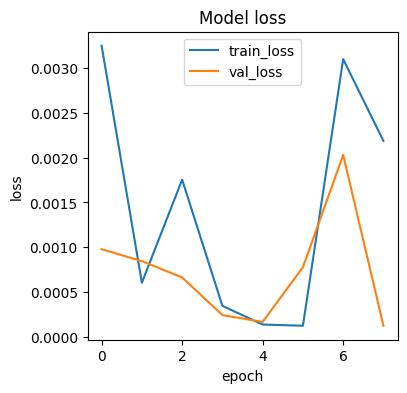

In [ ]:
plt.figure(figsize = (4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

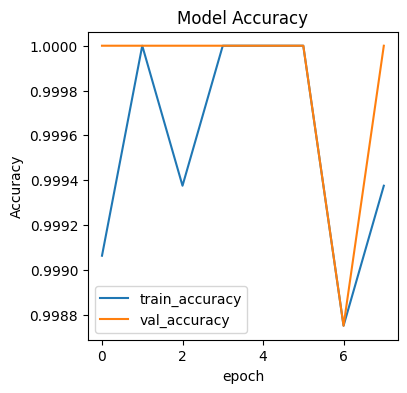

In [ ]:
plt.figure(figsize = (4,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

#Testing

In [ ]:
test_image = cv2.imread("/content/WhatsApp Image 2023-04-09 at 10.23.40 PM.jpeg")

im = tf.constant(test_image, dtype = tf.float32)
print(im.shape)
plt.imshow(test_image)

im = tf.expand_dims(im, axis = 0)
print(CLASS_NAMES[tf.argmax(lenet_model(im), axis = -1).numpy()[0]])

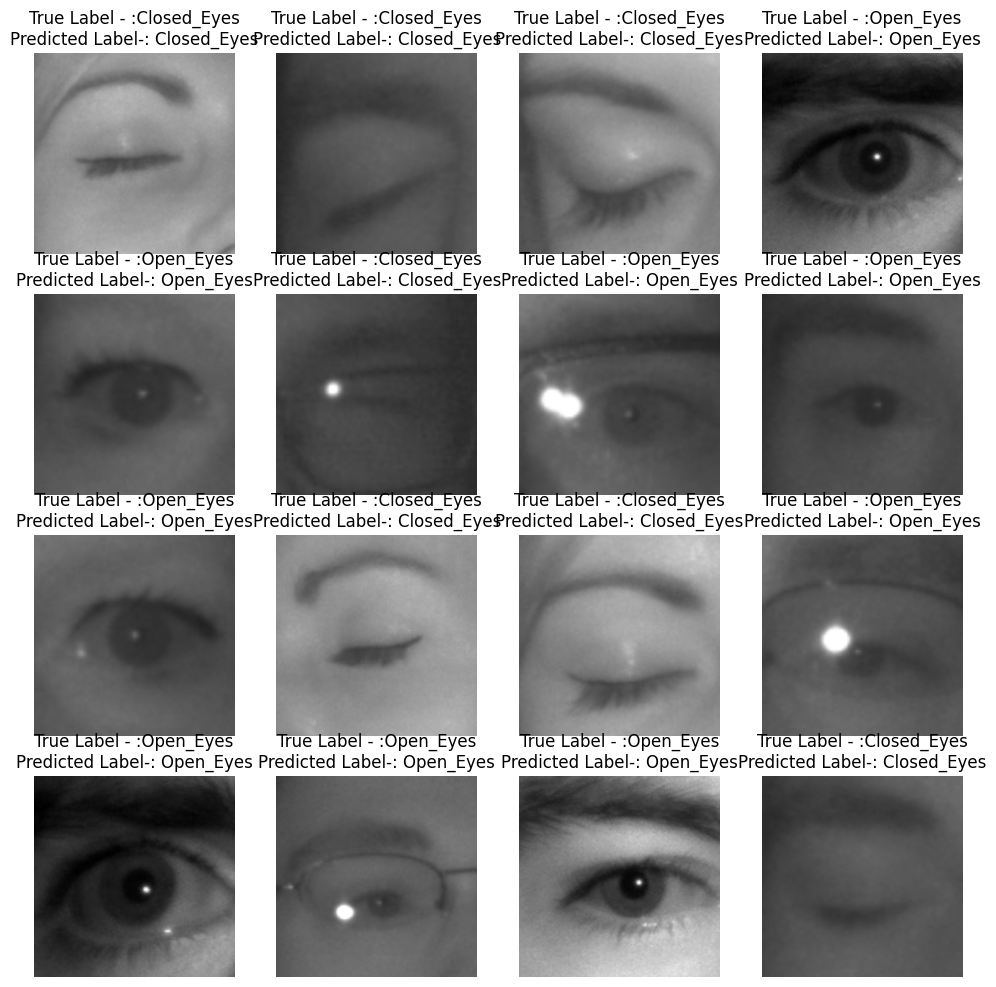

In [ ]:
plt.figure(figsize = (12,12))
for images, labels in train_data.take(1):
  for i in range(16):
    ax=plt.subplot(4,4, i+1)
    plt.imshow(images[i]/255.)
    plt.title("True Label - :" + CLASS_NAMES[tf.argmax(labels[i],axis =0).numpy()] + "\nPredicted Label-: " + CLASS_NAMES[tf.argmax(lenet_model(tf.expand_dims(images[i], axis=0)),axis=-1).numpy()[0]])
    plt.axis("off")

# Confusion Matrix

In [ ]:
predicted = []
labels = []
for im, label in test_data:
  predicted.append(lenet_model(im))
  labels.append(label.numpy())

In [ ]:
print(np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(),np.argmax(labels[-1], axis = -1).flatten()]))
print(np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(),np.argmax(predicted[-1], axis = -1).flatten()]))

[1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1
 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1
 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0
 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0
 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1
 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0
 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1
 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0
 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 1 1 0 0 0 0 0 1 0 0 

In [ ]:
pred = np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(),np.argmax(predicted[-1], axis = -1).flatten()])
label = np.concatenate([np.argmax(labels[:-1], axis = -1).flatten(),np.argmax(labels[-1], axis = -1).flatten()])

[[392   0]
 [  0 408]]


Text(0.5, 14.722222222222216, 'Predicted')

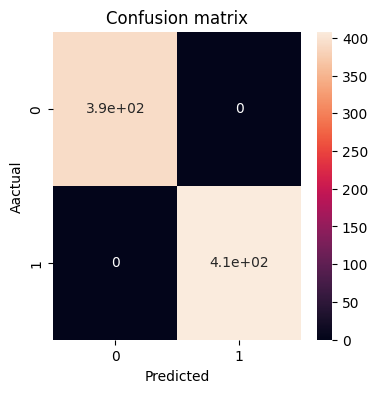

In [ ]:
cm = confusion_matrix(label, pred)
print(cm)
plt.figure(figsize = (4,4))

sns. heatmap(cm, annot = True)
plt.title('Confusion matrix')
plt.ylabel('Aactual')
plt.xlabel('Predicted')

In [ ]:
print(classification_report(label, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       392
           1       1.00      1.00      1.00       408

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



# Loading and Saving the Model

In [ ]:
pretrained_model = tf.keras.models.load_model("/content/drive/MyDrive/Drowsiness_detection/Drowsiness_model_efficient.h5")
pretrained_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 256, 256, 3)  7           ['rescaling_1[0][0]']            
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 256, 256, 3)  0           ['normalization[0][0]']      

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=34b5d40b787c5cae96c65ae52a96e2e51dacc67e2938f6656d2030b8af4a5967
  Stored in directory: /root/.cache/pip/wheels/d5/b2/a9/590d15767d34955f20a9a033e8db973b79cb5672d95790c0a9
Successfully built sklearn
